In [1]:
!pip install gradio==2.0.10


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 40.6 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=595fc7cda36053da677ef50bf5263cd15b7a1bbc709d1b3c97e47d339887d533
  Stored in directory: /root/.cache/pip/wheels/bd/65/9a/671fc6dcde07d4418df0c592f8df512b26d7a0029c2a23dd81
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3354 sha256=fb8843b1941f65f255c3903ec3f72f4143675ebff1169a49bcf36694585ed168
  Stor

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



In [3]:
# loading the data from csv file to Pandas DataFrame
big_mart_data = pd.read_csv('/content/Train.csv')

In [4]:
# first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [6]:
# getting some information about thye dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [7]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

Mean --> average

Mode --> more repeated value

In [8]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [9]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [10]:
# mode of "Outlet_Size" column
big_mart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [11]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [12]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
miss_values = big_mart_data['Outlet_Size'].isnull()

In [14]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [15]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [16]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [17]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [18]:
sns.set()

<ipython-input-19-21151ade0b57>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


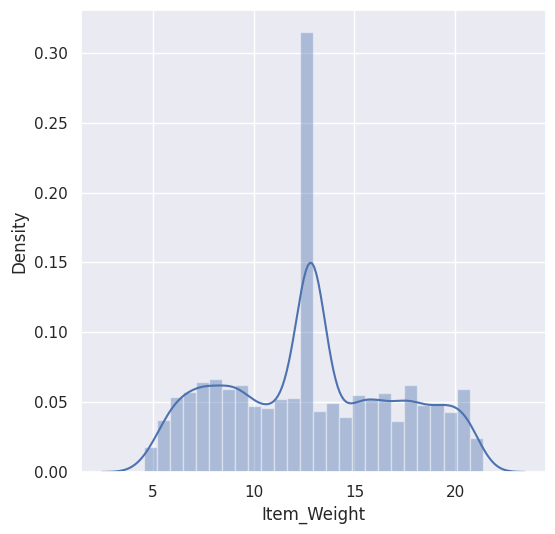

In [19]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

<ipython-input-20-386044597ca3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


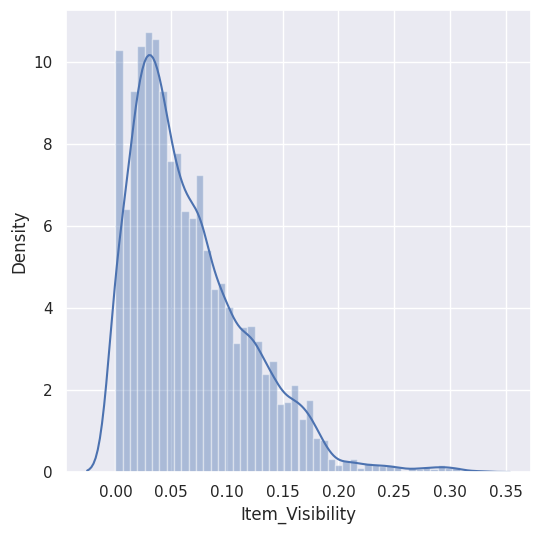

In [20]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

<ipython-input-21-0b69bf4930c1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


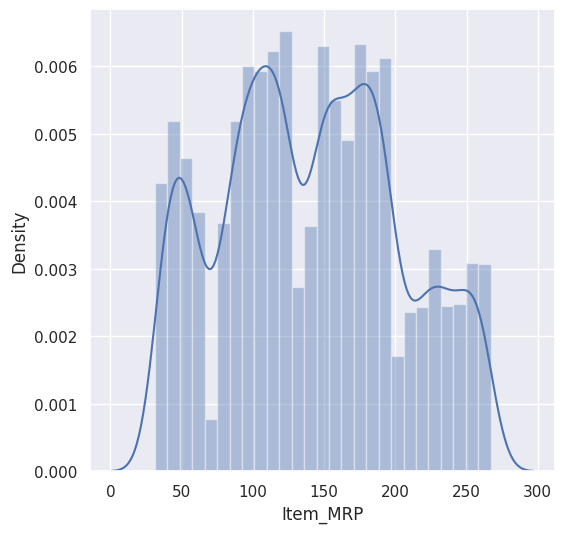

In [21]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

<ipython-input-22-dedd64409ff7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


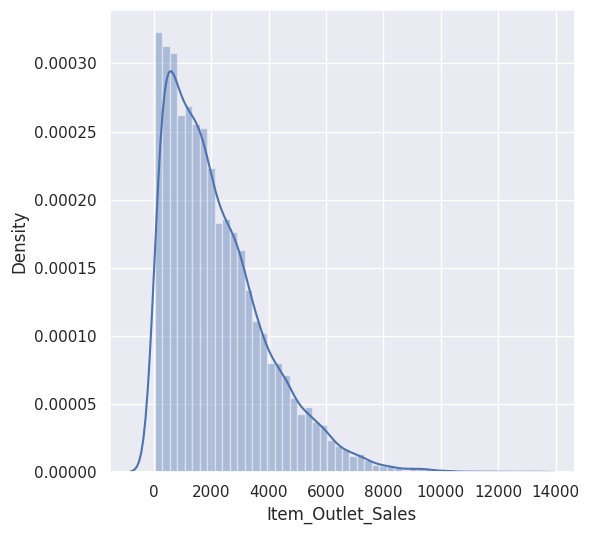

In [22]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

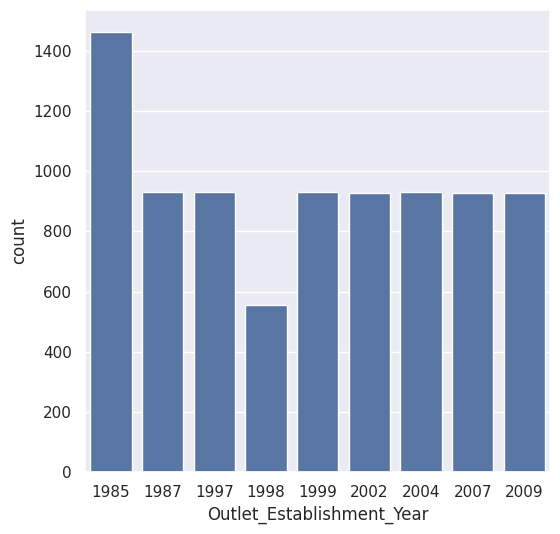

In [23]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

Categorical Features

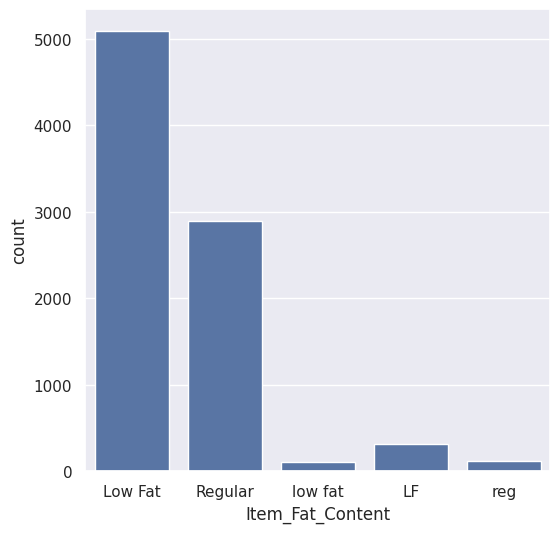

In [24]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

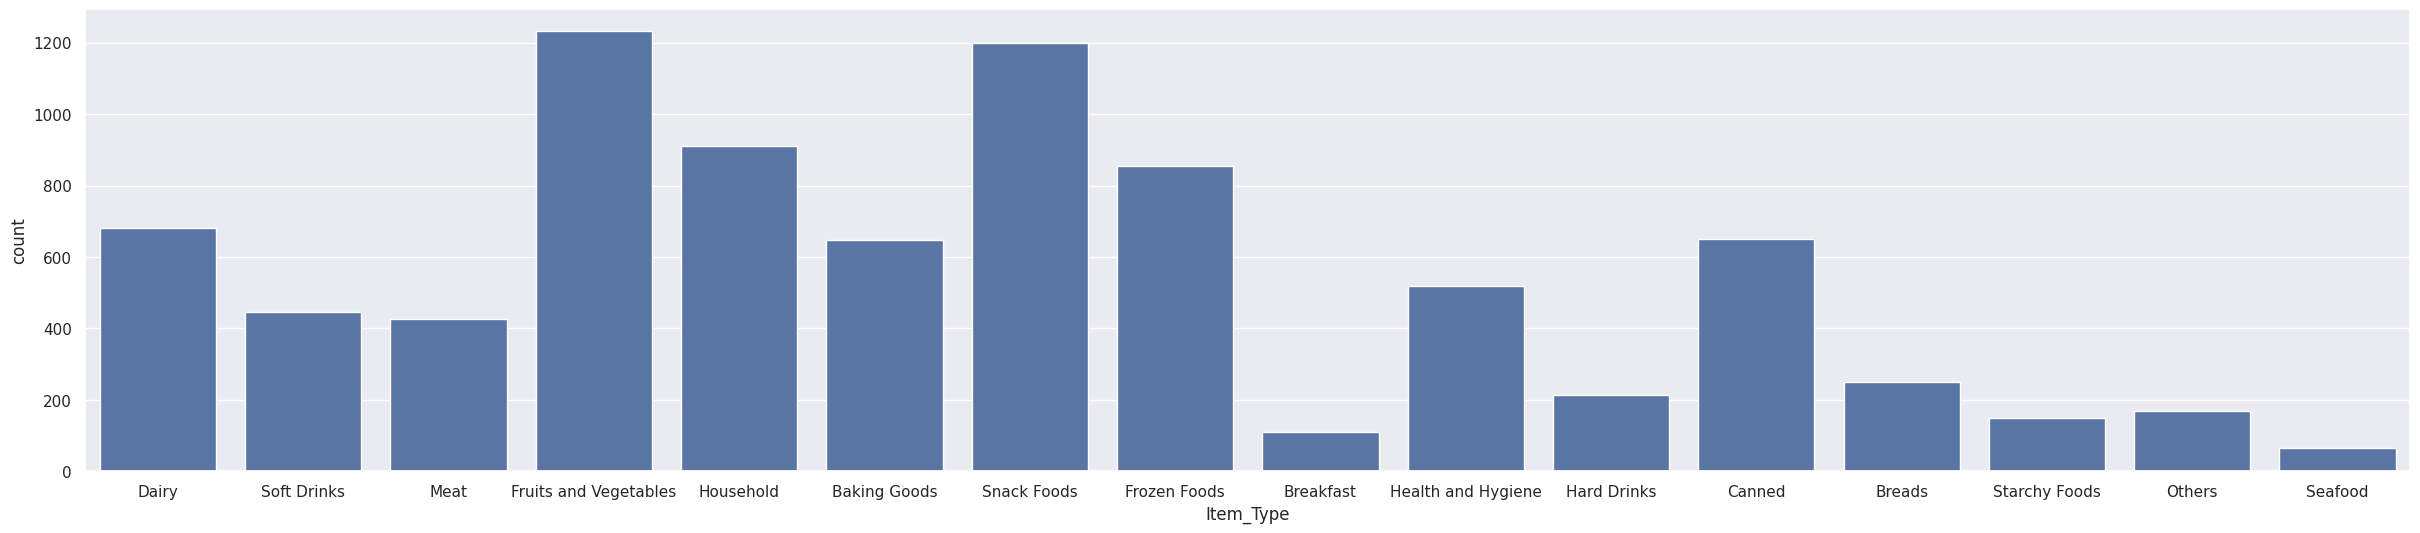

In [25]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

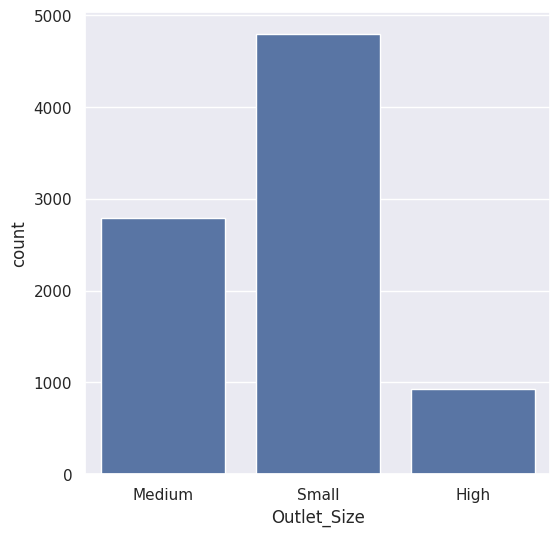

In [26]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

Data Pre-Processing

In [27]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [29]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [30]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [31]:
encoder = LabelEncoder()

In [32]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [33]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and Target

In [34]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [35]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [36]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into Training data & Testing Data

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training

XGBoost Regressor

In [39]:
regressor = XGBRegressor()

In [40]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [41]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [42]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [43]:
print('R Squared value = ', r2_train)

R Squared value =  0.8762174618111388


In [44]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [45]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [46]:
print('R Squared value = ', r2_test)

R Squared value =  0.5017253991620692


In [47]:
new_data = pd.read_csv('/content/Train.csv')

In [48]:
new_data['Item_Weight'].fillna(new_data['Item_Weight'].mean(), inplace=True)

In [49]:
miss_values_new_data = new_data['Outlet_Size'].isnull()
new_data.loc[miss_values_new_data, 'Outlet_Size'] = new_data.loc[miss_values_new_data, 'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [50]:
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [51]:
# Label encoding for new data
for column in categorical_columns:
    known_values = set(encoder.classes_)
    new_data[column] = new_data[column].apply(lambda x: x if x in known_values else 'Unknown')

# Handle unknown categories by adding a new label for them
for column in categorical_columns:
    new_values = set(new_data[column])
    unknown_values = new_values - known_values
    if unknown_values:
        encoder.classes_ = np.concatenate([encoder.classes_, np.array(list(unknown_values))])

# Now, perform label encoding
for column in categorical_columns:
    new_data[column] = encoder.transform(new_data[column])


In [52]:
X_new_data = new_data.drop(columns='Item_Outlet_Sales', axis=1)

In [53]:
new_data_predictions = regressor.predict(X_new_data)


In [54]:
new_data['Predicted_Sales'] = new_data_predictions

In [55]:
print(new_data[['Item_Identifier', 'Predicted_Sales']])

      Item_Identifier  Predicted_Sales
0                   9      5355.953613
1                   9       545.265869
2                   9      2277.253906
3                   9       357.063324
4                   9       313.551849
...               ...              ...
8518                9      2447.844482
8519                9      1574.687378
8520                9      1200.332886
8521                9      2354.015869
8522                9      1316.794434

[8523 rows x 2 columns]


In [56]:
import string
import numpy as np

# Assuming 'new_data' is your DataFrame with the 'Item_Identifier' column
# Find the indices where 'Item_Identifier' is numeric
numeric_indices = new_data[new_data['Item_Identifier'].astype(str).str.isnumeric()].index

# Generate unique alphanumeric values for 'Item_Identifier'
unique_alphanumeric_values = list(string.ascii_uppercase) + list(map(str, range(10, 36)))

# Replace the numeric values in 'Item_Identifier' with alphanumeric values
new_data.loc[numeric_indices, 'Item_Identifier'] = np.random.choice(unique_alphanumeric_values, size=len(numeric_indices))

# Print the updated new_data
print(new_data[['Item_Identifier', 'Predicted_Sales']])


     Item_Identifier  Predicted_Sales
0                 16      5355.953613
1                 27       545.265869
2                  Q      2277.253906
3                  B       357.063324
4                 22       313.551849
...              ...              ...
8518               I      2447.844482
8519              18      1574.687378
8520              16      1200.332886
8521               Y      2354.015869
8522               F      1316.794434

[8523 rows x 2 columns]


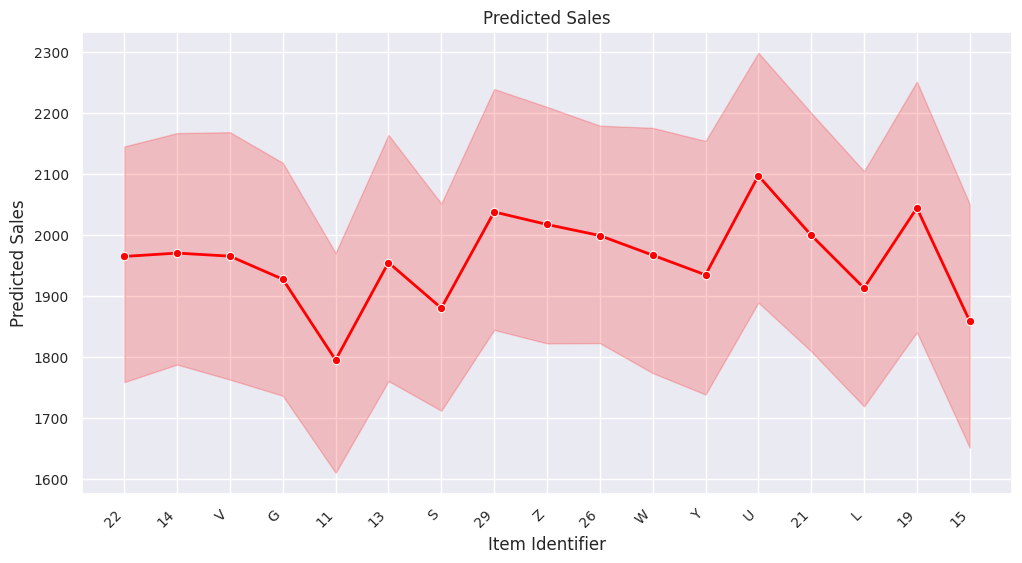

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total predicted sales for each item identifier
total_predicted_sales = new_data.groupby('Item_Identifier')['Predicted_Sales'].sum()

# Select the top 10 item identifiers based on total predicted sales
top_item_identifiers = total_predicted_sales.sort_values(ascending=False).head(17).index

# Filter the data for the top 10 item identifiers
top_item_data = new_data[new_data['Item_Identifier'].isin(top_item_identifiers)]

# Plot the predicted sales for each item using a line chart with red color
plt.figure(figsize=(12, 6))
sns.lineplot(x='Item_Identifier', y='Predicted_Sales', data=top_item_data, marker='o', linewidth=2, color='red')

# Customize the plot
plt.title('Predicted Sales', fontsize=12)
plt.xlabel('Item Identifier', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


In [58]:
print(new_data['Item_Identifier'].dtype)


object


In [59]:
print(new_data.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Predicted_Sales'],
      dtype='object')


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


data = pd.read_csv('/content/Train.csv')

# Step 1: Create a new feature 'Price_Category'
# You can adjust the bins based on your data distribution
bins = [0, 100, 200, 300, 400, 500]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
data['Price_Category'] = pd.cut(data['Item_MRP'], bins=bins, labels=labels, include_lowest=True)

# Step 2: Encode categorical columns
le = LabelEncoder()
data['Price_Category'] = le.fit_transform(data['Price_Category'])

# Step 3: Split the data into training and testing sets
X = data[['Price_Category']]
y = data['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a model (Random Forest Regressor in this example)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 7: Predict sales ratio for a new dataset
# Replace 'new_data.csv' with your new dataset
new_data = pd.read_csv('/content/Train.csv')
new_data['Price_Category'] = pd.cut(new_data['Item_MRP'], bins=bins, labels=labels, include_lowest=True)
new_data['Price_Category'] = le.transform(new_data['Price_Category'])

new_data['Predicted_Sales'] = model.predict(new_data[['Price_Category']])

# Display the new_data with predicted sales ratio
print(new_data[['Item_MRP', 'Price_Category', 'Predicted_Sales']])

Mean Squared Error: 1975797.61227789
      Item_MRP  Price_Category  Predicted_Sales
0     249.8092               1      3673.658697
1      48.2692               2      1022.149207
2     141.6180               0      2344.621176
3     182.0950               0      2344.621176
4      53.8614               2      1022.149207
...        ...             ...              ...
8518  214.5218               1      3673.658697
8519  108.1570               0      2344.621176
8520   85.1224               2      1022.149207
8521  103.1332               0      2344.621176
8522   75.4670               2      1022.149207

[8523 rows x 3 columns]


In [61]:
print(new_data['Item_Identifier'].unique())


['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(new_data['Price_Category'], new_data['Predicted_Sales'], color='blue')
plt.xlabel('Price Category')
plt.ylabel('Predicted Sales')
plt.title('Predicted Sales for Different Price Categories')
plt.show()


In [62]:
pip install gradio

In [63]:
!pip install gradio --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: gradio
    Found existing installation: gradio 2.0.10
    Uninstalling gradio-2.0.10:
  

In [64]:
!pip install -q gradio==3.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.3 MB/s eta 0:00:00


In [65]:
import gradio as gr
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = RandomForestRegressor(random_state=42)

# Load the new_data DataFrame
new_data = pd.read_csv('/content/Train.csv')

# Encode the 'Price_Category' feature in new_data
bins = [0, 100, 200, 300, 400, 500]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
new_data['Price_Category'] = pd.cut(new_data['Item_MRP'], bins=bins, labels=labels, include_lowest=True)

# Encode categorical columns
le = LabelEncoder()
new_data['Price_Category'] = le.fit_transform(new_data['Price_Category'])

# Fit the model on the training data
model.fit(X_train, y_train)  # Replace X_train and y_train with your actual training data

# Define function to predict sales
def predict_sales(item_identifier):
    try:
        # Assuming 'Item_Identifier' is a column in new_data
        item_row = new_data[new_data['Item_Identifier'] == item_identifier]
        if len(item_row) == 0:
            return "Item not found in dataset"
        else:
            predicted_sales = model.predict(item_row[['Price_Category']])[0]
            return predicted_sales
    except Exception as e:
        return str(e)

# Define Gradio interface
iface = gr.Interface(fn=predict_sales, inputs="text", outputs="text", title="Sales Prediction", description="Enter the Item Identifier to get the predicted sales.")

# Launch the interface
iface.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>